# IMPORTANDO OS MÓDULOS

In [1]:
# IMPORTAÇÃO DO MÓDULOS PARA ANÁLISE E GRÁGICOS

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn
from pywaffle import Waffle

sn.set(style="whitegrid")
sn.set_palette("RdBu", n_colors=7)

figt = (10, 5)
num = 0

%matplotlib inline

# FORMATO PADRÃO PARA A IMPORTAÇÃO DOS DADOS

In [2]:
""" 
Para utilizar o  modelo

Os dados deverão ser importados no formato “.csv”, uft-16, separados por tab (Esta configuração poderá ser alterada no código)

O arquivo “.csv” deverá ter o “Nome das colunas”, “Tipo dos dados” e “Formato” conforme tabela baixo. (Também é possível 
alterar este padrão, mas também deverá ser alterado no código)

"""
descricao = pd.read_excel("_DESCRIÇÃO DOS DADOS.xls")
descricao

,CAMPO,TIPO,TAMANHO,FORMATO,DESCRIÇÃO,CAMPO USADO NA PREVISÃO
0,'SIAPE',TEXTO,7,-,MATRÍCULA DO SERVIDOR,-
1,'SERVIDOR',TEXTO,-,-,NOME DO SERVIDOR,-
2,'DT NASCIMENTO',DATA,10,AAAA-MM-DD,DATA DE NASCIMENTO,SIM
3,'IDADE',NUMERO,-,-,IDADE DO SERVIDOR,SIM
4,'SEXO',CHAR,1,-,SEXO DO SERVIDOR,SIM
5,'ESTADO CIVIL',TEXTO,-,-,ESTADO CIVIL DO SERVIDOR,SIM
6,'ESCOLARIDADE',TEXTO,-,-,ESCOLARIDADE DO SERVIDOR,SIM
7,'TITULAÇÃO',TEXTO,-,-,TITULAÇÃO DO SERVIDOR,SIM
8,'ETNIA',TEXTO,-,-,ETNIA DO SERVIDOR,SIM
9,'NACIONALIDADE',TEXTO,-,-,NACIONALIDADE DO SERVIDOR,-


# IMPORTANDO OS DADOS

In [3]:
# DESCRIÇÃO PADRÃO DAS COLUNAS
colunas = ['SIAPE', 'SERVIDOR', 'DT NASCIMENTO', 'IDADE',  'SEXO', 'ESTADO CIVIL', 'ESCOLARIDADE', 'TITULAÇÃO', 'ETNIA',
       'NACIONALIDADE', 'REG JUR', 'TEMPO SERVIÇO', 'CARREIRA', 'CARGO', 'CLASSE', 'LOTAÇÃO', 'AMBIENTE', 
        'EXERCÍCIO', 'GRUPO', 'UPAG', 'CH', 'DT INGRESSO ÓRGÃO SP', 'DT INATIVIDADE', 'DT EXCLUSÃO']


# CARREGA OS DADOS DOS SERVIDORES APOSENTADOS
aposentados = pd.read_csv('2020-07-01 SERVIDORES - (APOSENTADOS).csv', sep='\t', encoding='utf-16')

# CARREGA OS DADOS DOS SERVIDORES ATIVOS
ativos = pd.read_csv('2020-07-01 SERVIDORES - ATIVOS - (TODOS).csv', sep='\t', encoding='utf-16')

# JUNTA AS DUAS BASE DE DADOS
dados = pd.concat([ativos, aposentados])
dados.reset_index()

# FILTRA AS COLUNAS EM CADA BASE DE DADOS
ativos = ativos[colunas]

aposentados = aposentados[colunas]

dados = dados[colunas]

# ANÁLISE DOS DADOS

In [4]:
# EXIBE AS COLUNAS DA BASE DE DADOS

aposentados.columns

Index(['SIAPE', 'SERVIDOR', 'DT NASCIMENTO', 'IDADE', 'SEXO', 'ESTADO CIVIL',
       'ESCOLARIDADE', 'TITULAÇÃO', 'ETNIA', 'NACIONALIDADE', 'REG JUR',
       'TEMPO SERVIÇO', 'CARREIRA', 'CARGO', 'CLASSE', 'LOTAÇÃO', 'AMBIENTE',
       'EXERCÍCIO', 'GRUPO', 'UPAG', 'CH', 'DT INGRESSO ÓRGÃO SP',
       'DT INATIVIDADE', 'DT EXCLUSÃO'],
      dtype='object')

In [5]:
# EXIBE AS COLUNAS DA BASE DE DADOS

ativos.columns

Index(['SIAPE', 'SERVIDOR', 'DT NASCIMENTO', 'IDADE', 'SEXO', 'ESTADO CIVIL',
       'ESCOLARIDADE', 'TITULAÇÃO', 'ETNIA', 'NACIONALIDADE', 'REG JUR',
       'TEMPO SERVIÇO', 'CARREIRA', 'CARGO', 'CLASSE', 'LOTAÇÃO', 'AMBIENTE',
       'EXERCÍCIO', 'GRUPO', 'UPAG', 'CH', 'DT INGRESSO ÓRGÃO SP',
       'DT INATIVIDADE', 'DT EXCLUSÃO'],
      dtype='object')

In [6]:
# ANÁLISE ESTATÍSTICA PRELIMINAR

ativos.describe()

,SIAPE,IDADE,TEMPO SERVIÇO,DT INATIVIDADE,DT EXCLUSÃO
count,2.091000e+03,2091.000000,2091.000000,0.0,0.0
mean,1.828653e+06,46.165471,13.140603,NaN,NaN
std,9.790463e+05,10.516579,9.883113,NaN,NaN
min,4.828800e+04,23.000000,0.000000,NaN,NaN
25%,1.282942e+06,38.000000,6.000000,NaN,NaN
50%,1.695433e+06,45.000000,11.000000,NaN,NaN
75%,2.209156e+06,55.000000,18.000000,NaN,NaN
max,9.605096e+06,74.000000,47.000000,NaN,NaN


In [7]:
# ANÁLISE DOS CAMPOS

ativos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2091 entries, 0 to 2090
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SIAPE                 2091 non-null   int64  
 1   SERVIDOR              2091 non-null   object 
 2   DT NASCIMENTO         2091 non-null   object 
 3   IDADE                 2091 non-null   int64  
 4   SEXO                  2091 non-null   object 
 5   ESTADO CIVIL          2091 non-null   object 
 6   ESCOLARIDADE          2091 non-null   object 
 7   TITULAÇÃO             2091 non-null   object 
 8   ETNIA                 2091 non-null   object 
 9   NACIONALIDADE         2091 non-null   object 
 10  REG JUR               2091 non-null   object 
 11  TEMPO SERVIÇO         2091 non-null   int64  
 12  CARREIRA              2091 non-null   object 
 13  CARGO                 2090 non-null   object 
 14  CLASSE                2084 non-null   object 
 15  LOTAÇÃO              

In [8]:
# ANÁLISE ESTATÍSTICA PRELIMINAR

aposentados.describe()

,SIAPE,IDADE,TEMPO SERVIÇO,DT EXCLUSÃO
count,9.040000e+02,904.000000,904.000000,0.0
mean,9.937190e+05,67.123894,33.222345,NaN
std,1.490490e+06,8.171075,8.652278,NaN
min,4.826000e+04,45.000000,6.000000,NaN
25%,3.893232e+05,61.000000,26.000000,NaN
50%,3.897305e+05,66.000000,34.000000,NaN
75%,1.115926e+06,71.000000,39.000000,NaN
max,7.389933e+06,94.000000,69.000000,NaN


In [9]:
# ANÁLISE DOS CAMPOS

aposentados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SIAPE                 904 non-null    int64  
 1   SERVIDOR              904 non-null    object 
 2   DT NASCIMENTO         904 non-null    object 
 3   IDADE                 904 non-null    int64  
 4   SEXO                  904 non-null    object 
 5   ESTADO CIVIL          904 non-null    object 
 6   ESCOLARIDADE          904 non-null    object 
 7   TITULAÇÃO             904 non-null    object 
 8   ETNIA                 904 non-null    object 
 9   NACIONALIDADE         904 non-null    object 
 10  REG JUR               904 non-null    object 
 11  TEMPO SERVIÇO         904 non-null    int64  
 12  CARREIRA              904 non-null    object 
 13  CARGO                 904 non-null    object 
 14  CLASSE                900 non-null    object 
 15  LOTAÇÃO               5

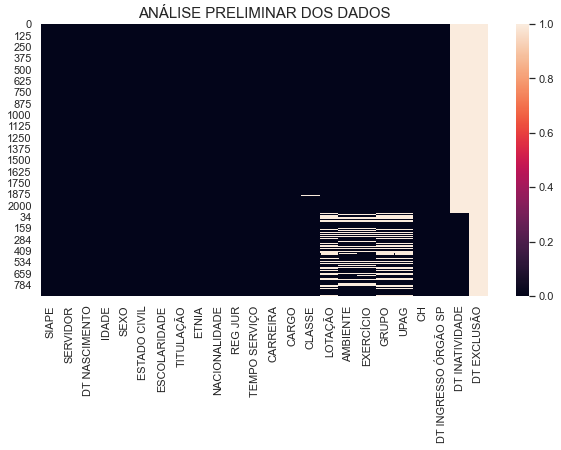

In [10]:
# ANÁLISE DA BASE DE DADOS TOTAL PARA VERIFICAR SE TEM DADOS FALTANDO

fig, ax = plt.subplots(figsize=figt)
ax = sn.heatmap(dados.isnull(), )
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('ANÁLISE PRELIMINAR DOS DADOS', fontsize=15)

num += 1
fig.savefig('GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

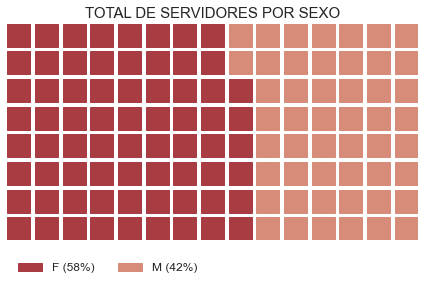

In [11]:
# ANÁLISE DOS DADOS TOTAIS POR SEXO

dd = dados['SEXO'].value_counts()
total = len(dados)

fig = plt.figure(
    FigureClass = Waffle,
    rows = 8,
    columns = 15,
    values = dd,
    title={
        'label': 'TOTAL DE SERVIDORES POR SEXO',
        'loc': 'center',
        'fontdict': { 'fontsize': 15 }
    },
    labels=["{0} ({1}%)".format(k, round(v / total * 100)) for k, v in dd.items()],
    legend={
#         'labels': ["{0} ({1}%)".format(k, v) for k, v in data.items()],  # lebels could also be under legend instead
        'loc': 'lower left',
        'bbox_to_anchor': (0, -0.2),
        'ncol': len(dd),
        'framealpha': 0,
        'fontsize': 12
    },
    colors = ('#a93c43', '#d68c78')
)

num += 1
fig.savefig('GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

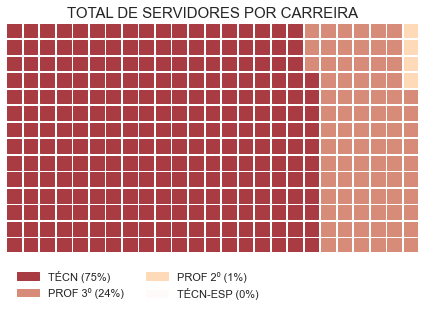

In [12]:
# ANÁLISE DOS DADOS TOTAIS POR CARREIRA

dd = dados['CARREIRA'].value_counts()
total = len(dados)

fig = plt.figure(
    FigureClass = Waffle,
    rows = 14,
    columns = 25,
    values = dd,
    title={ 'label': 'TOTAL DE SERVIDORES POR CARREIRA', 
           'loc': 'center',
            'fontdict': { 'fontsize': 15 }  },
    labels=["{0} ({1}%)".format(k, round(v / total * 100)) for k, v in dd.items()],
    legend={'loc': 'lower left', 
            'bbox_to_anchor': (0, -0.25), 
            'ncol': 2, 
            'framealpha': 0},
    colors = ('#a93c43', '#d68c78', '#FFDAB9', '#FFFAFA')
)
    
num += 1
# fig.savefig('GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

# ANÁLISE DOS SERVIDORES INATIVOS

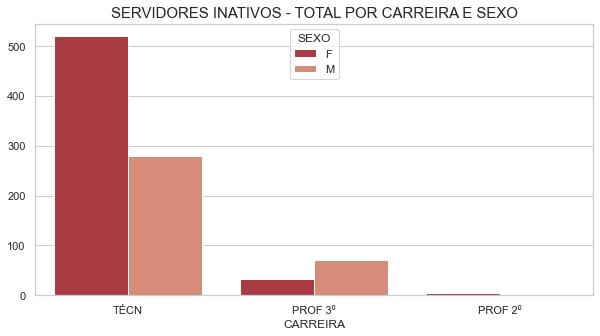

In [13]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots(figsize=figt)
ax = sn.countplot(x='CARREIRA', data=aposentados, hue='SEXO')
ax.set_xlabel('CARREIRA')
ax.set_ylabel('')
ax.set_title('SERVIDORES INATIVOS - TOTAL POR CARREIRA E SEXO', fontsize=15)

num += 1
fig.savefig('GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

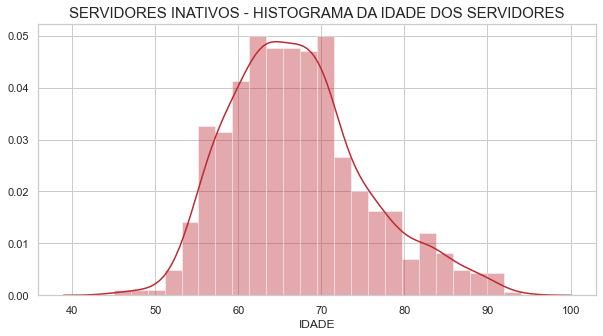

In [14]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots(figsize=figt)
ax = sn.distplot(aposentados['IDADE'])
ax.set_xlabel('IDADE')
ax.set_ylabel('')
ax.set_title('SERVIDORES INATIVOS - HISTOGRAMA DA IDADE DOS SERVIDORES', fontsize=15)

num += 1
fig.savefig('GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

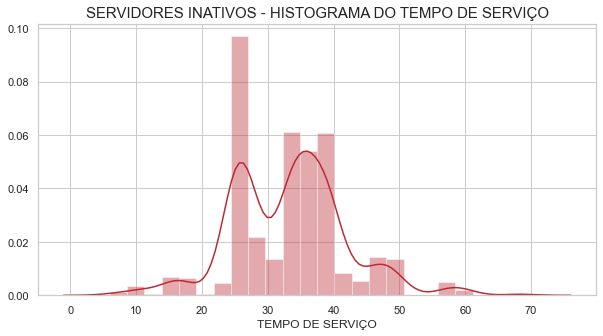

In [15]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots(figsize=figt)
ax = sn.distplot(aposentados['TEMPO SERVIÇO'])
ax.set_xlabel('TEMPO DE SERVIÇO')
ax.set_ylabel('')
ax.set_title('SERVIDORES INATIVOS - HISTOGRAMA DO TEMPO DE SERVIÇO', fontsize=15)

num += 1
fig.savefig('GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

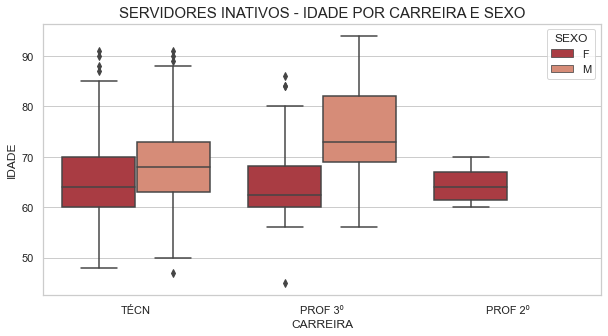

In [16]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots(figsize=figt)
ax = sn.boxplot(x='CARREIRA', y= 'IDADE', data=aposentados, hue='SEXO')
ax.set_xlabel('CARREIRA')
ax.set_ylabel('IDADE')
ax.set_title('SERVIDORES INATIVOS - IDADE POR CARREIRA E SEXO', fontsize=15)

num += 1
fig.savefig('GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

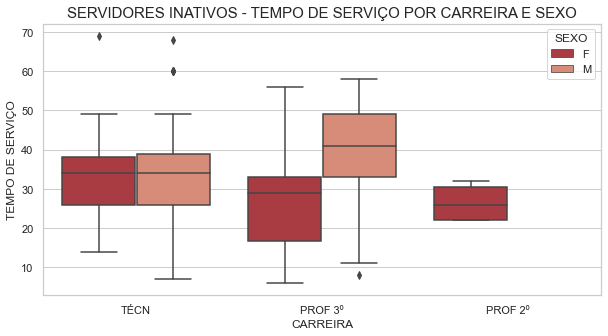

In [17]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots(figsize=figt)
ax = sn.boxplot(x='CARREIRA', y= 'TEMPO SERVIÇO', data=aposentados, hue='SEXO')
ax.set_xlabel('CARREIRA')
ax.set_ylabel('TEMPO DE SERVIÇO')
ax.set_title('SERVIDORES INATIVOS - TEMPO DE SERVIÇO POR CARREIRA E SEXO', fontsize=15)

num += 1
fig.savefig('GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

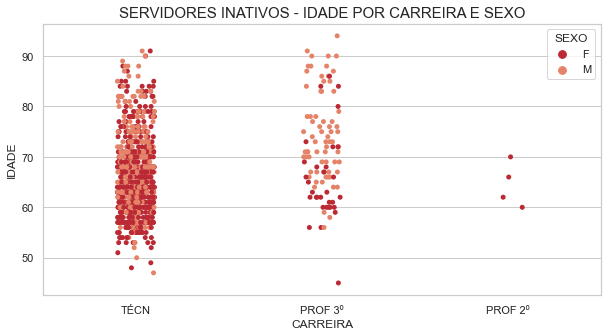

In [18]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots(figsize=figt)
ax = sn.stripplot(x='CARREIRA', y= 'IDADE', data=aposentados, hue='SEXO')
ax.set_xlabel('CARREIRA')
ax.set_ylabel('IDADE')
ax.set_title('SERVIDORES INATIVOS - IDADE POR CARREIRA E SEXO', fontsize=15)

num += 1
fig.savefig('GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

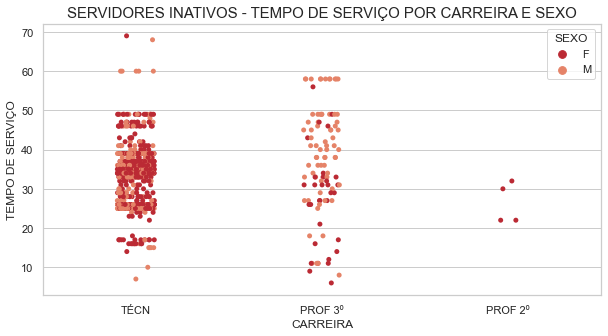

In [19]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots(figsize=figt)
ax = sn.stripplot(x='CARREIRA', y= 'TEMPO SERVIÇO', data=aposentados, hue='SEXO')
ax.set_xlabel('CARREIRA')
ax.set_ylabel('TEMPO DE SERVIÇO')
ax.set_title('SERVIDORES INATIVOS - TEMPO DE SERVIÇO POR CARREIRA E SEXO', fontsize=15)

num += 1
fig.savefig('GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

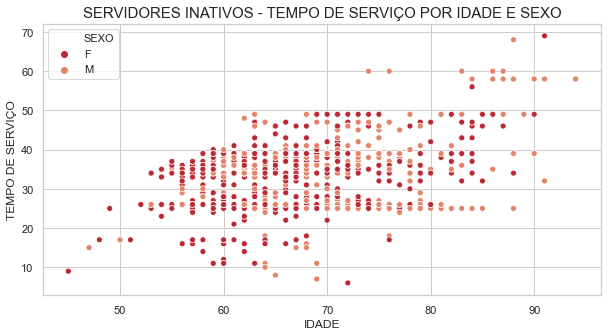

In [20]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots(figsize=figt)
ax = sn.scatterplot(x='IDADE', y='TEMPO SERVIÇO', data=aposentados, hue='SEXO')
ax.set_xlabel('IDADE')
ax.set_ylabel('TEMPO DE SERVIÇO')
ax.set_title('SERVIDORES INATIVOS - TEMPO DE SERVIÇO POR IDADE E SEXO', fontsize=15)

num += 1
fig.savefig('GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

# ANÁLISE DOS SERVIDORES ATIVOS

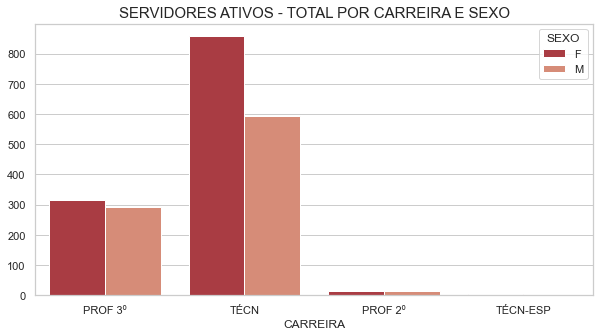

In [21]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots(figsize=figt)
ax = sn.countplot(x='CARREIRA', data=ativos, hue='SEXO')
ax.set_xlabel('CARREIRA')
ax.set_ylabel('')
ax.set_title('SERVIDORES ATIVOS - TOTAL POR CARREIRA E SEXO', fontsize=15)

num += 1
fig.savefig('GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

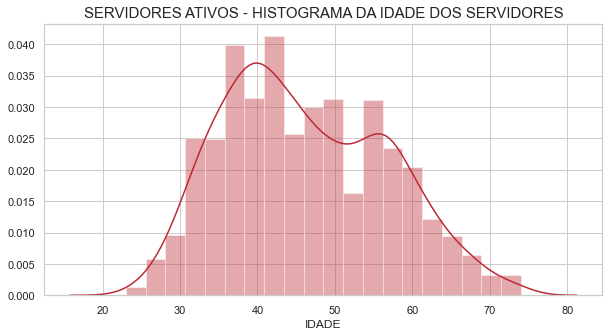

In [22]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots(figsize=figt)
ax = sn.distplot(ativos['IDADE'])
ax.set_xlabel('IDADE')
ax.set_ylabel('')
ax.set_title('SERVIDORES ATIVOS - HISTOGRAMA DA IDADE DOS SERVIDORES', fontsize=15)

num += 1
fig.savefig('GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

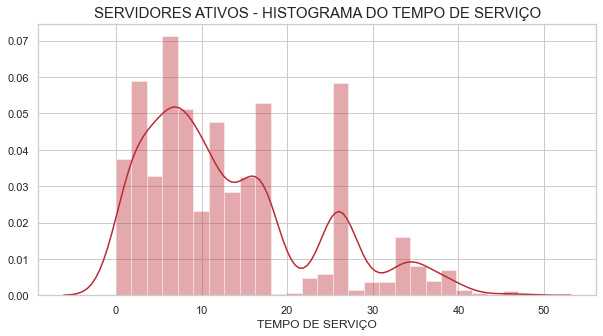

In [23]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots(figsize=figt)
ax = sn.distplot(ativos['TEMPO SERVIÇO'])
ax.set_xlabel('TEMPO DE SERVIÇO')
ax.set_ylabel('')
ax.set_title('SERVIDORES ATIVOS - HISTOGRAMA DO TEMPO DE SERVIÇO', fontsize=15)

num += 1
fig.savefig('GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

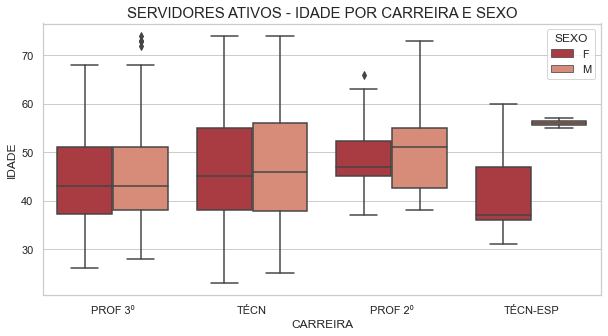

In [24]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots(figsize=figt)
ax = sn.boxplot(x='CARREIRA', y= 'IDADE', data=ativos, hue='SEXO')
ax.set_xlabel('CARREIRA')
ax.set_ylabel('IDADE')
ax.set_title('SERVIDORES ATIVOS - IDADE POR CARREIRA E SEXO', fontsize=15)

num += 1
fig.savefig('GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

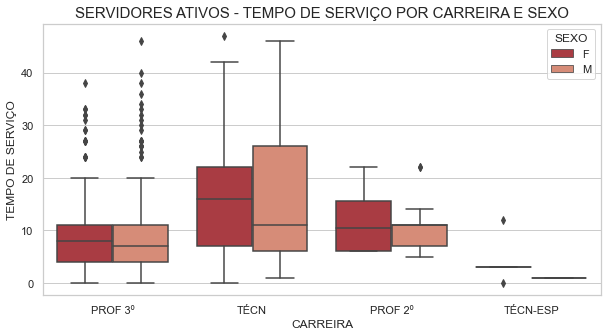

In [25]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots(figsize=figt)
ax = sn.boxplot(x='CARREIRA', y= 'TEMPO SERVIÇO', data=ativos, hue='SEXO')
ax.set_xlabel('CARREIRA')
ax.set_ylabel('TEMPO DE SERVIÇO')
ax.set_title('SERVIDORES ATIVOS - TEMPO DE SERVIÇO POR CARREIRA E SEXO', fontsize=15)

num += 1
fig.savefig('GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

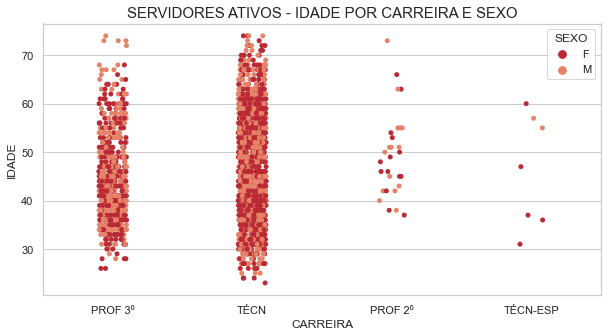

In [26]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots(figsize=figt)
ax = sn.stripplot(x='CARREIRA', y= 'IDADE', data=ativos, hue='SEXO')
ax.set_xlabel('CARREIRA')
ax.set_ylabel('IDADE')
ax.set_title('SERVIDORES ATIVOS - IDADE POR CARREIRA E SEXO', fontsize=15)

num += 1
fig.savefig('GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

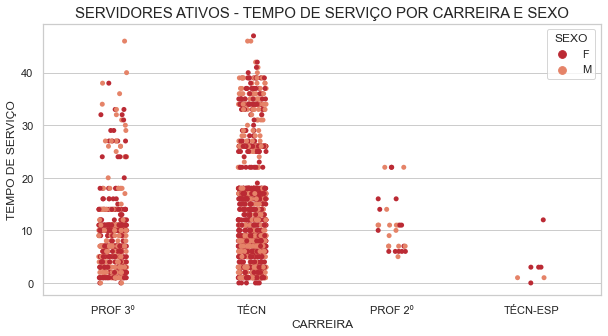

In [27]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots(figsize=figt)
ax = sn.stripplot(x='CARREIRA', y= 'TEMPO SERVIÇO', data=ativos, hue='SEXO')
ax.set_xlabel('CARREIRA')
ax.set_ylabel('TEMPO DE SERVIÇO')
ax.set_title('SERVIDORES ATIVOS - TEMPO DE SERVIÇO POR CARREIRA E SEXO', fontsize=15)

num += 1
fig.savefig('GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

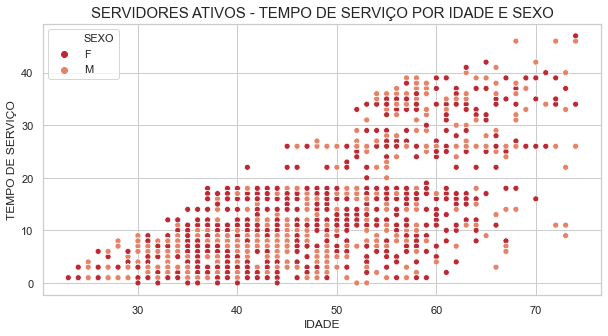

In [28]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots(figsize=figt)
ax = sn.scatterplot(x='IDADE', y='TEMPO SERVIÇO', data=ativos, hue='SEXO')
ax.set_xlabel('IDADE')
ax.set_ylabel('TEMPO DE SERVIÇO')
ax.set_title('SERVIDORES ATIVOS - TEMPO DE SERVIÇO POR IDADE E SEXO', fontsize=15)

num += 1
fig.savefig('GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

# MODELO DE IA

In [29]:
# CRIANDO A CLASS PARA PREVISÃO

class previsaoAposentadoria():
    
    def __init__(self):
        
        # VARIÁVEIS DO MODELO
        self.dadosModelo = None
        self.dadosPredicao = None
        
        self.dadostratadosModelo = None
        self.dadostratadosPredicao = None
        
        self.resultado = None
        
        self.modelo = None
        
        from sklearn.linear_model import LogisticRegression
        self.modelo = LogisticRegression()
        
        # DICIONÁRIOS DO MODELO
        self.dicEstadoCivil = {}
        self.dicCarreira = {}
        self.dicEscolaridade = {}
        self.dicTitulacao = {}
        self.dicEtnia = {}
        self.dicCH = {}
        
        
    def CriarDicionarios(self):
        """FUNÇÃO PARA TRANSFORMAR COLUNA EM TXT PARA NÚMERO
        ENTRA
            COLUNA X; VALORES {A, B, B, A, B}
        SAI
            TRANSFORMA A=1, B=2, ...
            E DEVOLVE 
            COLUNA X; VALORES {1, 2, 2, 1, 2}"""
        
        dd = self.dadosModelo
        
        tabela = [('ESTADO CIVIL', self.dicEstadoCivil),
                  ('CARREIRA', self.dicCarreira),
                  ('ESCOLARIDADE', self.dicEscolaridade),
                  ('TITULAÇÃO', self.dicTitulacao),
                  ('ETNIA', self.dicEtnia),
                  ('CH', self.dicCH)]
        
        for campo, dicionario in tabela:
            contador = 0
            for vl in dd[campo].unique():
                dicionario[vl] = contador
                contador += 1

        
    def Tratamento(self, opcao):
        """FUNÇÃO PARA TRATAR OS DADOS PARA APRENDIZADO OU PREVISÃO
        ENTRA 
            ENTRA OS DADOS TXT
        SAI
            SAI OS DADOS NUMÉRICOS"""
        
        if opcao == 0:
            dd = self.dadosModelo
        else:
            dd = self.dadosPredicao
        
        
        dd = dd[['DT NASCIMENTO', 'IDADE', 'SEXO', 'ESTADO CIVIL', 'ESCOLARIDADE', 'TITULAÇÃO', 
                    'ETNIA', 'REG JUR', 'TEMPO SERVIÇO', 'CARREIRA',  'CH', 'DT INGRESSO ÓRGÃO SP']]
        
        # TRANFORMA SEXO EM 0 OU 1
        SEXO_M = pd.get_dummies(dd['SEXO'], drop_first=True)
        dd['SEXO'] = SEXO_M
        
        # RETIRA O ANO DA DATA
        dd['DT NASCIMENTO'] = dd['DT NASCIMENTO'].apply(lambda x: int(x[:4]))
        dd['DT INGRESSO ÓRGÃO SP'] = dd['DT INGRESSO ÓRGÃO SP'].apply(lambda x: int(x[:4]))
        
        # TRANFORMA O REG JUR PARA APOSENTADO = 1 E 0 PARA OUTROS VALORES
        dd['REG JUR'] = dd['REG JUR'].apply(lambda x: 1 if x == "APOSENTADO" else 0)
        
        # TRANFORMA OS CAMPOS TEXTO PARA NÚMERICO
        dd['ESTADO CIVIL'] = dd['ESTADO CIVIL'].apply(lambda x: self.dicEstadoCivil[x])
        dd['CARREIRA'] = dd['CARREIRA'].apply(lambda x: self.dicCarreira[x])
        dd['ESCOLARIDADE'] = dd['ESCOLARIDADE'].apply(lambda x: self.dicEscolaridade[x])
        dd['TITULAÇÃO'] = dd['TITULAÇÃO'].apply(lambda x: self.dicTitulacao[x])
        dd['ETNIA'] = dd['ETNIA'].apply(lambda x: self.dicEtnia[x])
        dd['CH'] = dd['CH'].apply(lambda x: self.dicCH[x])
        
        # SEPARA O APRENDIZADO DA PREVISÃO
        if opcao == 0:
            self.dadostratadosModelo = dd
        else:
            self.dadostratadosPredicao = dd
        
        
    def Treinamento(self, opcao):
        """FUNÇÃO PARA FAZER O APRENDIZAGEM
        ENTRA
            ENTRA OS DADOS TRATADOS (NUMÉRICOS)
        SAI
            SAI O MODELO TREINADO OU A PREVISÃO"""
        
        # IMPORTAÇÃO DOS MÓDULOS
        from sklearn.model_selection import train_test_split
        from sklearn.metrics import classification_report
        from sklearn.metrics import confusion_matrix
        
        if opcao == 0:
            # TREINAMENTO DOS DADOS
            dd = self.dadostratadosModelo
            
            x = dd.drop('REG JUR', axis=1)
            y = dd['REG JUR']
            
            xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

            self.modelo.fit(xtrain, ytrain)
            predict = self.modelo.predict(xtest)
            
            print('-' * 20)
            print('CLASSIFICATION REPORTE')
            print()
            print(classification_report(ytest, predict))
            print('-' * 20)
            
            print('CONFUSION MATRIX')
            print()
            print(confusion_matrix(ytest, predict))
            print('-' * 20)
            
        else:
            # PREVISÃO DOS DADOS
            dd = self.dadostratadosPredicao
            x = dd.drop('REG JUR', axis=1)

            predict = self.modelo.predict(x)
            self.resultado = predict

# TREINANDO O MODELO

In [30]:
# TREINANDO O MODELO
# CRIA O OBJETO
previsao = previsaoAposentadoria()

# PASSA OS DADOS (ATIVOS E APOSENTADOS)
previsao.dadosModelo = dados

# TRATA OS DADOS (ATIVOS E APOSENTADOS)
previsao.CriarDicionarios()
previsao.Tratamento(0)

# FAZ O TREINAMENTO DOS DADOS (ATIVOS E APOSENTADOS)
previsao.Treinamento(0)

--------------------
CLASSIFICATION REPORTE

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       633
           1       0.82      0.82      0.82       266

   micro avg       0.89      0.89      0.89       899
   macro avg       0.87      0.87      0.87       899
weighted avg       0.89      0.89      0.89       899

--------------------
CONFUSION MATRIX

[[585  48]
 [ 48 218]]
--------------------


C:\Users\tiago\anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tiago\anaconda3\lib\site-packages\ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tiago\anaconda3\lib\site-packages\ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

# CRIANDO A PREVISÃO

In [31]:
# PASSA OS DADOS DOS ATIVOS PARA PREVISÃO
previsao.dadosPredicao = ativos

# TRATA DOS DADOS DOS ATIVOS
previsao.Tratamento(1)

# FAZ A PREVISÃO DOS ATIVOS
previsao.Treinamento(1)

C:\Users\tiago\anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tiago\anaconda3\lib\site-packages\ipykernel_launcher.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\tiago\anaconda3\lib\site-packages\ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

# RESULTADO DA PREVISÃO

In [32]:
# RESULTADO DA PREVISÃO

previsao.resultado

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
# SUBSTITUI O "REG JUR" COM A PREVISÃO (SENDO 0=ATIVO, 1=PREVISÃO DE APOSENTADO)

ativos['REG JUR'] = previsao.resultado
ativos[ativos['REG JUR'] == 1].to_csv('PREVISÃO DE APOSENTADORIA.csv', sep='\t', encoding='utf-16')

In [34]:
# CONFERENCIA NO TOTAL DE ATIVOS

len(ativos)

2091

In [35]:
# TOTAL DE ATIVOS E PREVISÃO DE APOSENTADOS

ativos['REG JUR'].value_counts()

0    1930
1     161
Name: REG JUR, dtype: int64

In [36]:
# PERCENTIL DE APOSENTADOS

ativos['REG JUR'].value_counts()[1] / len(ativos)

0.07699665231946437

# ANÁLISE DA PREVISÃO

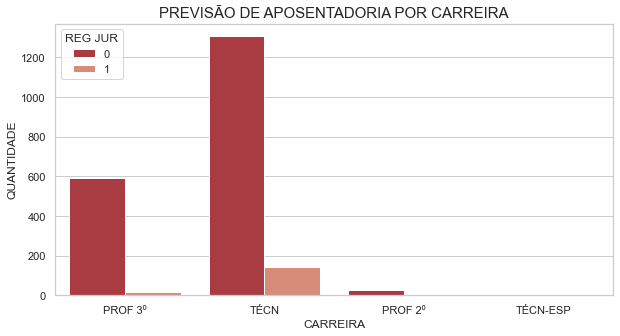

In [37]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots(figsize=figt)
ax = sn.countplot(x='CARREIRA', data=ativos, hue='REG JUR')
ax.set_xlabel('CARREIRA')
ax.set_ylabel('QUANTIDADE')
ax.set_title('PREVISÃO DE APOSENTADORIA POR CARREIRA', fontsize=15)

num += 1
fig.savefig('GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

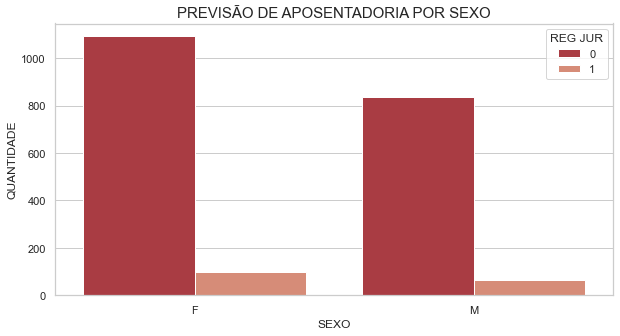

In [38]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots(figsize=figt)
ax = sn.countplot(x='SEXO', data=ativos, hue='REG JUR')
ax.set_xlabel('SEXO')
ax.set_ylabel('QUANTIDADE')
ax.set_title('PREVISÃO DE APOSENTADORIA POR SEXO', fontsize=15)

num += 1
fig.savefig('GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

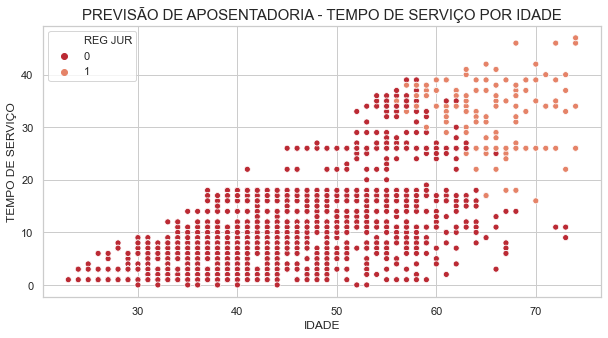

In [39]:
# ANÁLISE GRÁFICA

fig, ax = plt.subplots(figsize=figt)
ax = sn.scatterplot(x='IDADE', y='TEMPO SERVIÇO', data=ativos, hue='REG JUR')
ax.set_xlabel('IDADE')
ax.set_ylabel('TEMPO DE SERVIÇO')
ax.set_title('PREVISÃO DE APOSENTADORIA - TEMPO DE SERVIÇO POR IDADE', fontsize=15)

num += 1
fig.savefig('GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

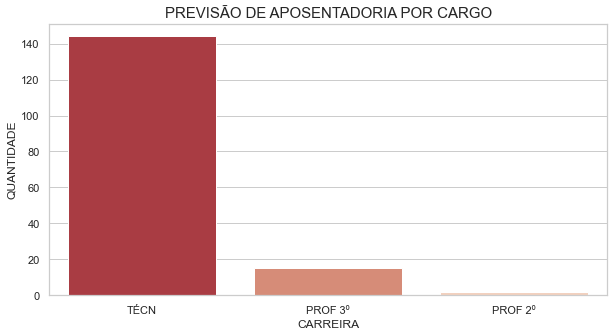

In [40]:
# ANÁLISE GRÁFICA

a, b, = zip(*ativos[ativos['REG JUR'] == 1]['CARREIRA'].value_counts().items())
dd = pd.DataFrame({'CARREIRA': a, 'TOTAL': b})

fig, ax = plt.subplots(figsize=figt)
ax = sn.barplot(x='CARREIRA', y='TOTAL', data=dd)
ax.set_xlabel('CARREIRA')
ax.set_ylabel('QUANTIDADE')
ax.set_title('PREVISÃO DE APOSENTADORIA POR CARGO', fontsize=15)

num += 1
fig.savefig('GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

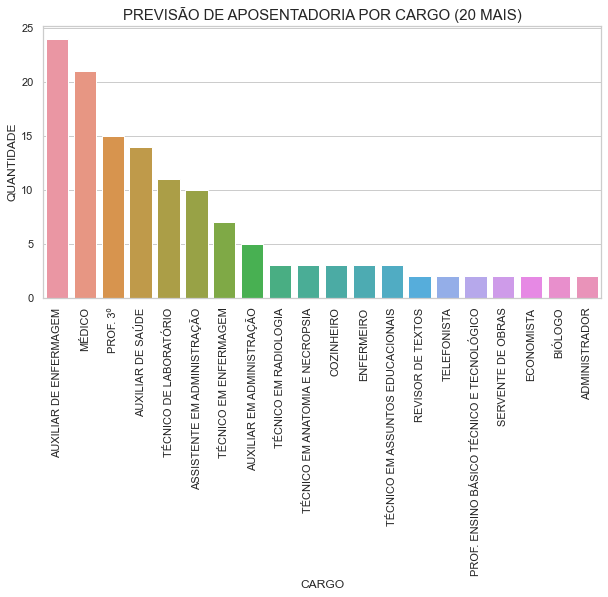

In [41]:
# ANÁLISE GRÁFICA

a, b, = zip(*ativos[ativos['REG JUR'] == 1]['CARGO'].value_counts().items())
dd = pd.DataFrame({'CARGO': a, 'TOTAL': b})

fig, ax = plt.subplots(figsize=figt)
ax = sn.barplot(x='CARGO', y='TOTAL', data=dd[:20])
ax.set_xlabel('CARGO')
ax.set_ylabel('QUANTIDADE')
ax.set_title('PREVISÃO DE APOSENTADORIA POR CARGO (20 MAIS)', fontsize=15)
plt.xticks(rotation=90)

num += 1
fig.savefig('GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

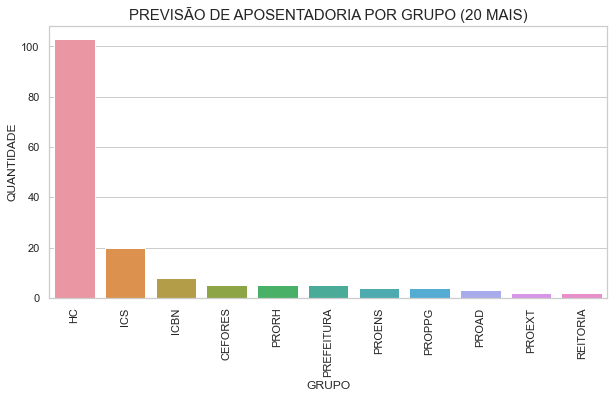

In [42]:
# ANÁLISE GRÁFICA

a, b, = zip(*ativos[ativos['REG JUR'] == 1]['GRUPO'].value_counts().items())
dd = pd.DataFrame({'GRUPO': a, 'TOTAL': b})

fig, ax = plt.subplots(figsize=figt)
ax = sn.barplot(x='GRUPO', y='TOTAL', data=dd[:20])
ax.set_xlabel('GRUPO')
ax.set_ylabel('QUANTIDADE')
ax.set_title('PREVISÃO DE APOSENTADORIA POR GRUPO (20 MAIS)', fontsize=15)
plt.xticks(rotation=90)

num += 1
fig.savefig('GRAF' + str(num).rjust(3,'0'), bbox_inches='tight')

# FIM